In [25]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sympy.ntheory import isprime, quadratic_residues
import cv2 as cv
from PIL import Image
#from tqdm import tqdm

## Perlin Noise

In [2]:
#!pip3 install git+https://github.com/pvigier/perlin-numpy

  Cloning https://github.com/pvigier/perlin-numpy to /private/var/folders/bf/1zrl6cfj69b9p252q9m92kp00000gn/T/pip-req-build-rj7wwx6w
  Running command git clone --filter=blob:none --quiet https://github.com/pvigier/perlin-numpy /private/var/folders/bf/1zrl6cfj69b9p252q9m92kp00000gn/T/pip-req-build-rj7wwx6w
  Resolved https://github.com/pvigier/perlin-numpy to commit 5e26837db14042e51166eb6cad4c0df2c1907016
  Preparing metadata (setup.py) ... done
  Created wheel for perlin-numpy: filename=perlin_numpy-0.0.0-py3-none-any.whl size=4724 sha256=a3f12092fd1ba777a614dba92f60d3732193b007a0711c6bfeca3825b93fe0e7
  Stored in directory: /private/var/folders/bf/1zrl6cfj69b9p252q9m92kp00000gn/T/pip-ephem-wheel-cache-amk7iqfo/wheels/e1/27/2f/c4a80de6e28009b6fd435bb52156a16937c7939e5dcdbc9850
Successfully built perlin-numpy


In [2]:
from perlin_numpy import generate_perlin_noise_2d

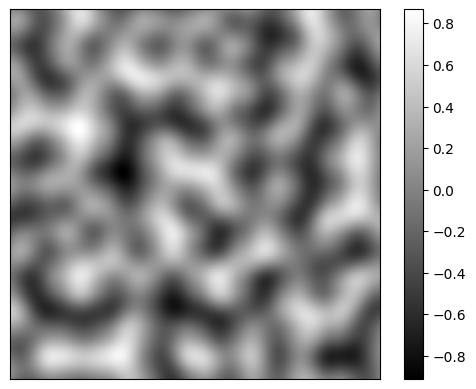

In [5]:
noise = generate_perlin_noise_2d((256, 256), (8, 8))
plt.imshow(noise, cmap='gray')#, interpolation='lanczos')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.savefig('perlin_noise.png', bbox_inches='tight')
np.save("perlin_noise.npy", noise)

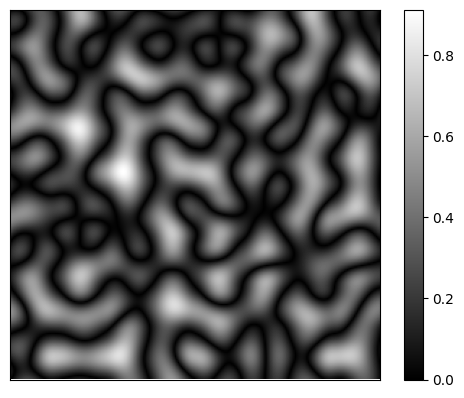

In [8]:
plt.imshow(abs(noise), cmap='gray')#, interpolation='lanczos')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.savefig('perlin_abs.png', bbox_inches='tight')
np.save("perlin_abs.npy", abs(noise))

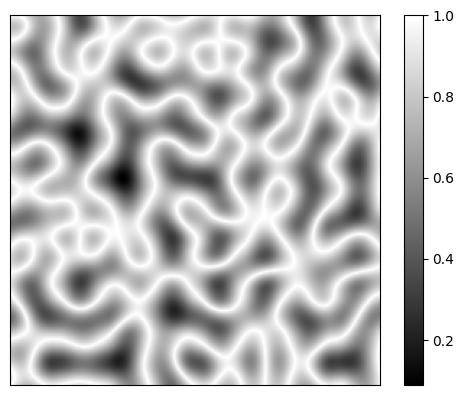

In [9]:
plt.imshow(1-abs(noise), cmap='gray')#, interpolation='lanczos')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.savefig('perlin_minus_abs.png', bbox_inches='tight')
np.save("perlin_minus_abs.npy", 1-abs(noise))

In [18]:
noise.shape

(256, 256)

In [64]:
sqrt_noise = abs(noise) ** 0.5 * np.sign(noise)

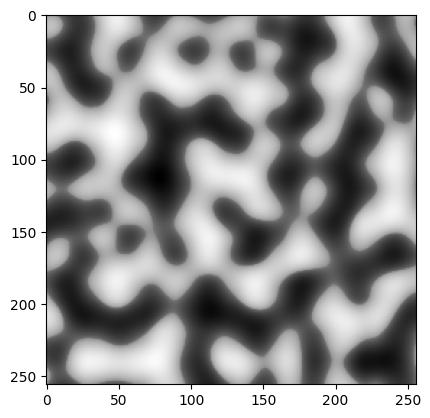

In [67]:
noise_as_img = np.interp(noise, (-1,1), (0,255)).astype(np.uint8)
sqrt_noise_as_img = np.interp(sqrt_noise, (-1,1), (0,255)).astype(np.uint8)
plt.imshow(sqrt_noise_as_img, cmap='gray')

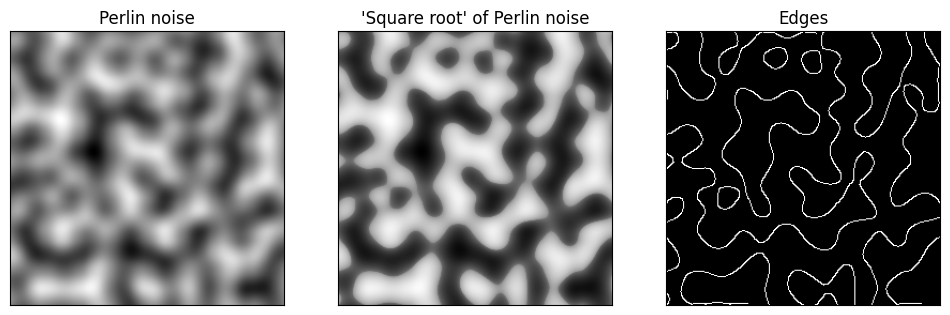

In [79]:
edges = cv.Canny(sqrt_noise_as_img,0,255)
np.save('edges.npy', edges)

plt.figure(figsize=(12,5))
plt.subplot(131),plt.imshow(noise_as_img, cmap = 'gray')
plt.title('Perlin noise'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(sqrt_noise_as_img, cmap = 'gray')
plt.title("'Square root' of Perlin noise"), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(edges, cmap = 'gray')
plt.title('Edges'), plt.xticks([]), plt.yticks([])
plt.savefig('edge_detection.png', bbox_inches='tight')
plt.show()